In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data/IRIS.csv')

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data = data.sample(frac=1, random_state=42)
data.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
31,5.4,3.4,1.5,0.4,Iris-setosa
64,5.6,2.9,3.6,1.3,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor


In [9]:
features = data.drop(['species'], axis = 1)
label = data[['species']]


In [10]:
features = features.to_numpy()
features.shape

(150, 4)

In [11]:
features_new = np.insert(features, 0, 1, axis=1)
features_new.shape

(150, 5)

In [12]:
val = list(label['species'].unique())
val

['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']

In [13]:
one_hot_encoded_data = np.asarray(pd.get_dummies(label, columns = ['species']))

In [14]:
label.drop(['species'], axis=1)
label = one_hot_encoded_data

In [15]:
train_x = features_new[:100, :]
train_y = label[:100, :]
val_x = features_new[100:, :]
val_y = label[100:, :]

In [16]:
alpha = 0.1
np.random.seed(42)
weights =  np.random.rand(5,3)
loss_list = []
val_loss = []
for i in range(1000):
  # Train
  z = np.dot(train_x,weights)
  num = np.exp(z)
  den = np.sum(num, axis=1)
  den = den.reshape(den.shape[0],1)
  y_hat = num/den
  loss = -np.mean(np.sum(train_y*np.log(y_hat), axis=1))
  print('Epoch: '+str(i+1)+" Loss: "+str(loss))
  loss_list.append(loss)
  dw = 1/train_x.shape[0] * (np.dot(train_x.T, (y_hat - train_y) ))
  weights-=alpha * dw

  # Validation
  z = np.dot(val_x,weights)
  num = np.exp(z)
  den = np.sum(num, axis=1)
  den = den.reshape(den.shape[0],1)
  y_hat = num/den
  loss = -np.mean(np.sum(val_y*np.log(y_hat), axis=1))
  print("Val Loss: "+str(loss))
  val_loss.append(loss)

Epoch: 1 Loss: 2.1004506671717333
Val Loss: 1.509786517113955
Epoch: 2 Loss: 1.6920795710393788
Val Loss: 1.5030026953245588
Epoch: 3 Loss: 1.561391041888593
Val Loss: 1.2527095012003577
Epoch: 4 Loss: 1.4246496028312652
Val Loss: 1.272457208316857
Epoch: 5 Loss: 1.2951666231653391
Val Loss: 1.084006858710195
Epoch: 6 Loss: 1.1891715525434925
Val Loss: 1.0975654843963507
Epoch: 7 Loss: 1.0921401160332818
Val Loss: 0.9535616620936943
Epoch: 8 Loss: 1.0105386989893796
Val Loss: 0.9568462046032079
Epoch: 9 Loss: 0.9386308190214039
Val Loss: 0.860081899022298
Epoch: 10 Loss: 0.8782187149807643
Val Loss: 0.8510500688555785
Epoch: 11 Loss: 0.828852076154499
Val Loss: 0.7974822021864317
Epoch: 12 Loss: 0.787576841797764
Val Loss: 0.7785668822800205
Epoch: 13 Loss: 0.7541790484237272
Val Loss: 0.7543095907947894
Epoch: 14 Loss: 0.7273759603681494
Val Loss: 0.7321530921810487
Epoch: 15 Loss: 0.7034643168975496
Val Loss: 0.722735555700553
Epoch: 16 Loss: 0.6864836804959812
Val Loss: 0.7033000810

## Prediction

In [17]:
x_test = np.asarray([1, 5.1,	3.5,	1.4,	0.2])

In [18]:
z = np.dot(weights.T, x_test)
num = np.exp(z)
den = np.sum(num)
y_hat = num/den

In [19]:
y_hat

array([9.91944528e-01, 8.05546520e-03, 7.05686876e-09])

# Plottiing Loss

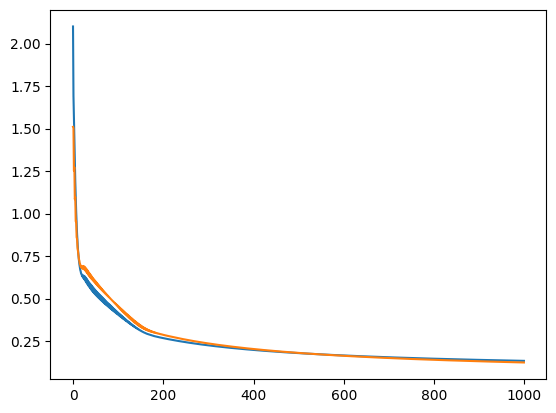

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(len(loss_list)), loss_list)
plt.plot(range(len(val_loss)), val_loss)
plt.show()